In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this document, we help you understand the training data for the entire project, for you to use for your demand estimation and pricing model. We also describe the test data (for which you have to do give optimal prices).

The training data is composed of 50000 customers, inside `train_pricing_decisions_2025.csv`.

For every training customer, you have:
1. a price they were offered for each item.
2. their decision for whether they purchased: `False` means they did not purchase the item, `True` means they purchased the item. 
3. three user covariates for each user to aid in personalized pricing. 

In [2]:
train_pricing_decisions = pd.read_csv('train_prices_decisions_2025.csv')
test_user_info = pd.read_csv('test_user_info_2025.csv')

In [3]:
train_pricing_decisions.head()

,user_index,Covariate1,Covariate2,Covariate3,price_item,item_bought
0,0,1.396069,0.228525,9.790878,0.010000,True
1,1,5.201819,2.212083,10.549586,50.563709,True
2,2,5.471765,0.568564,12.706814,82.305243,True
3,3,3.002355,1.185335,5.513210,38.611238,True
4,4,1.337119,1.374958,6.298567,86.705523,False


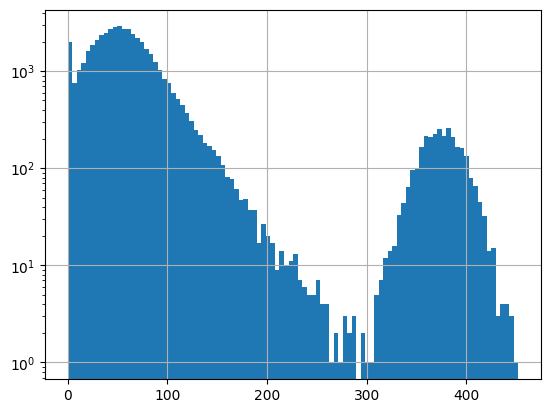

In [4]:
train_pricing_decisions.price_item.hist(bins = 100)
plt.yscale('log')

The following plot shows the marginal change of demand in response to the price offered:

/tmp/ipykernel_17088/3772219863.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_pricing_decisions.groupby(


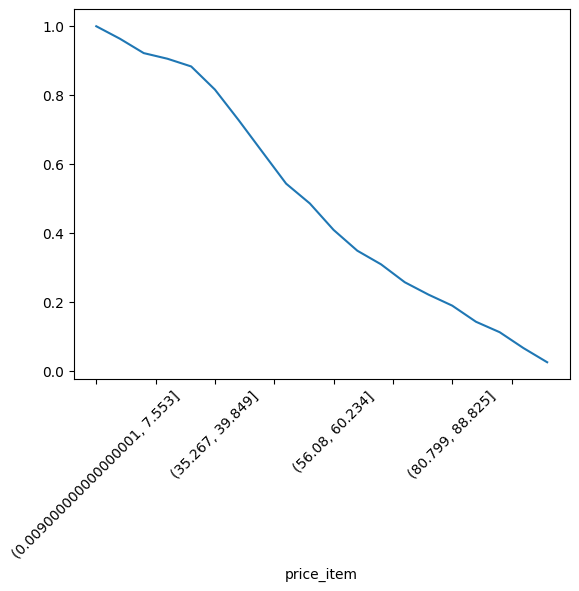

In [6]:
train_pricing_decisions.groupby(
    pd.qcut(train_pricing_decisions.price_item, 20))['item_bought'].mean().plot(kind='line')
_ = plt.xticks(rotation=45)

Of course, you might consider doing something more clever in estimating the demand, using the provided covariates. For example, customers have very different demand depending on their second covariate:

/tmp/ipykernel_17088/107556075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_pricing_decisions.loc[high_mask].groupby(
/tmp/ipykernel_17088/107556075.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_pricing_decisions.loc[~high_mask].groupby(


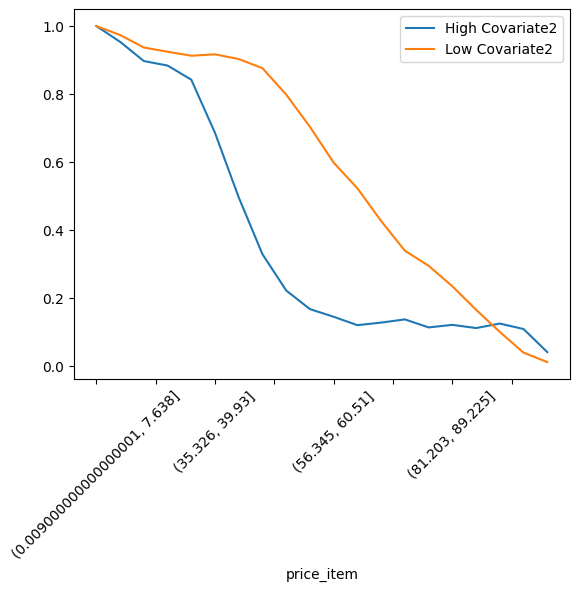

In [8]:
high_mask = train_pricing_decisions.Covariate2 > train_pricing_decisions.Covariate2.mean()
train_pricing_decisions.loc[high_mask].groupby(
    pd.qcut(train_pricing_decisions.loc[high_mask].price_item, 20))['item_bought'].mean().plot(kind='line', label = 'High Covariate2')
train_pricing_decisions.loc[~high_mask].groupby(
    pd.qcut(train_pricing_decisions.loc[~high_mask].price_item, 20))['item_bought'].mean().plot(kind='line', label = 'Low Covariate2')
_ = plt.legend()
_ = plt.xticks(rotation=45)

The test data just has user covariates. Your job is to calculate prices for each item so as to maximize expected revenue from that customer, as you did in Homework 3.

In [9]:
test_user_info.head()

,user_index,Covariate1,Covariate2,Covariate3
0,50000,0.584638,5.706175,9.668797
1,50001,3.548108,7.374092,5.104997
2,50002,1.713915,4.704735,8.012817
3,50003,5.767208,1.807943,6.023578
4,50004,1.021004,2.912415,11.899356


You will be asked to submit a CSV with your calculated optimal prices for each test customer.  The CSV should have four columns: (1) user_index, (2) price_item, and (3) expected_revenue. The file should be named `part1_static_prices_submission.csv`